In [49]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras import layers, models, Input

In [50]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [51]:
train_data_path = 'Facial_Images/train' 
val_data_path = 'Facial_Images/validation'

In [52]:
import os
x = 0
for expression in os.listdir(train_data_path):
    expression_path = os.path.join(train_data_path, expression)
    print(expression, "  ", len(os.listdir(expression_path)))
    x = x + len(os.listdir(expression_path))
print("Total Images", x)

angry    3993
disgust    436
fear    4103
happy    7164
neutral    4982
sad    4938
surprise    3205
Total Images 28821


In [53]:
emotions = []
x = 0
for expression in os.listdir(val_data_path):
    expression_path = os.path.join(val_data_path, expression)
    print(expression, "  ", len(os.listdir(expression_path)))
    data = [expression]
    x = x + len(os.listdir(expression_path))
    emotions.append(data)
print("Total Images", x)

angry    960
disgust    111
fear    1018
happy    1825
neutral    1216
sad    1139
surprise    797
Total Images 7066


In [54]:
emotions

[['angry'],
 ['disgust'],
 ['fear'],
 ['happy'],
 ['neutral'],
 ['sad'],
 ['surprise']]

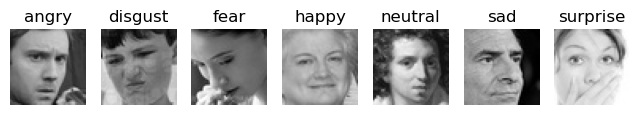

In [55]:
i = 1
plt.figure(figsize=(8, 8))

for expression in os.listdir(train_data_path):
    image_path = os.path.join(train_data_path, expression, os.listdir(os.path.join(train_data_path, expression))[0])
    image = load_img(image_path)
    
    plt.subplot(1, 7, i)
    plt.imshow(image)
    plt.title(expression)
    plt.axis('off')
    i += 1


In [56]:
train_data_gen = ImageDataGenerator()

train_dataset = train_data_gen.flow_from_directory(
    train_data_path,
    shuffle=True,
    target_size=(48, 48),
    color_mode='grayscale',
    class_mode='categorical',
    batch_size=128
)

Found 28821 images belonging to 7 classes.


In [57]:
val_data_gen = ImageDataGenerator()

val_dataset = val_data_gen.flow_from_directory(
    val_data_path,
    shuffle=False,
    target_size=(48, 48),
    color_mode='grayscale',
    class_mode='categorical',
    batch_size=128
)

Found 7066 images belonging to 7 classes.


In [58]:
model = models.Sequential()

model.add(Input(shape=(48, 48, 1)))  # Explicit input layer

model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(128, (5, 5), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())

model.add(layers.Dense(128))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.25))

model.add(layers.Dense(256))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.25))

model.add(layers.Dense(7, activation='softmax'))

model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 48, 48, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_18               │ (None, 48, 48, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 24, 24, 128)         │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_19               │ (None, 24, 24, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 12, 12, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_20               │ (None, 12, 12, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_21               │ (None, 6, 6, 512)           │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 3, 3, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_21 (Dropout)                 │ (None, 3, 3, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 128)                 │         589,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_22               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │              

 Total params: 2,311,047 (8.82 MB)

 Trainable params: 2,308,359 (8.81 MB)

 Non-trainable params: 2,688 (10.50 KB)

In [59]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=25,
    verbose=1
)

Epoch 1/25
226/226 ━━━━━━━━━━━━━━━━━━━━ 1010s 4s/step - accuracy: 0.2416 - loss: 1.9612 - val_accuracy: 0.3926 - val_loss: 1.5626
Epoch 2/25
226/226 ━━━━━━━━━━━━━━━━━━━━ 414s 2s/step - accuracy: 0.4263 - loss: 1.5046 - val_accuracy: 0.3766 - val_loss: 1.5955
Epoch 3/25
226/226 ━━━━━━━━━━━━━━━━━━━━ 1016s 5s/step - accuracy: 0.5012 - loss: 1.2920 - val_accuracy: 0.4519 - val_loss: 1.4356
Epoch 4/25
226/226 ━━━━━━━━━━━━━━━━━━━━ 337s 1s/step - accuracy: 0.5484 - loss: 1.1751 - val_accuracy: 0.5495 - val_loss: 1.1832
Epoch 5/25
226/226 ━━━━━━━━━━━━━━━━━━━━ 337s 1s/step - accuracy: 0.5809 - loss: 1.1049 - val_accuracy: 0.5447 - val_loss: 1.1857
Epoch 6/25
226/226 ━━━━━━━━━━━━━━━━━━━━ 337s 1s/step - accuracy: 0.6173 - loss: 1.0312 - val_accuracy: 0.5582 - val_loss: 1.1853
Epoch 7/25
226/226 ━━━━━━━━━━━━━━━━━━━━ 333s 1s/step - accuracy: 0.6316 - loss: 0.9775 - val_accuracy: 0.5894 - val_loss: 1.1170
Epoch 8/25
226/226 ━━━━━━━━━━━━━━━━━━━━ 335s 1s/step - accuracy: 0.6592 - loss: 0.9127 - val_ac

In [7]:
os.makedirs('models', exist_ok=True)

NameError: name 'os' is not defined

In [9]:
model.save('models/Face_Emotion_classification.keras')

NameError: name 'model' is not defined

In [11]:
import cv2

In [13]:
model = tf.keras.models.load_model('models/Face_Emotion_classification.keras')

image = cv2.imread('Google_Images/sample 1.jpg', cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image, (48, 48))
image = cv2.bitwise_not(image)
image = image.astype('float32') / 255.0
image = np.expand_dims(image, axis=(0, -1))

output = model.predict(image)
predicted_class = np.argmax(output)

emotion_labels = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
print(f"Predicted Emotion: {emotion_labels[predicted_class]}")

NameError: name 'tf' is not defined